In [1]:
obama=readLines("../Data/obama.txt")

In [2]:
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)

Loading required package: RColorBrewer


In [3]:
options(warn = -1)
library(tm)

Loading required package: NLP


In [4]:
docs = Corpus(VectorSource(obama))

In [5]:
# 결과 확인 
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 35

 [1] My fellow citizens:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
 [2] I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne 

In [6]:
toSpace = content_transformer(function(x,pattern)gsub(pattern,"",x))

In [7]:
docs=tm_map(docs,toSpace,"/")
docs=tm_map(docs,toSpace,"@")
docs=tm_map(docs,toSpace,"\\|")

In [8]:

# 모든 글자를 소문자로 변환 
docs = tm_map(docs,content_transformer(tolower))
# 숫자 제거 
docs = tm_map(docs, removeNumbers)
# common stopwords 제거 (불용어)
docs = tm_map(docs,removeWords,stopwords("english"))
# 특정어제거
docs = tm_map(docs,removeWords,c("-","and","the","every","people","let","must","less"))
# 의미없는 단어들 제거 
# Punctuation 제거 
docs= tm_map(docs,removePunctuation)
# 이중 여백 제거 
docs = tm_map(docs, stripWhitespace)
# 과거형 , 진행형 
#docs = tm_map(docs,stemDocument)

In [9]:
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 35

 [1]  fellow citizens                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2]  stand today humbled task us grateful trust bestowed mindful sacrifices borne ancestors thank president bush service nation well generosity cooperation shown throughout transition                                                                                                                                                                                                                                                               

In [10]:
dtm = TermDocumentMatrix(docs)
m =as.matrix(dtm)
v = sort(rowSums(m),decreasing = T)
d = data.frame(word = names(v), freq =v)
d=d[-1,]

In [11]:
head(d,10)

,word,freq
will,will,19
can,can,13
nation,nation,12
new,new,11
america,america,8
today,today,6
now,now,6
time,time,6
work,work,6
common,common,6


In [12]:
# 가장 많이 사용 된 will can nation new  today 등 단어들로 
# 지금보다 희망찬 미래로 나아가자란 다짐, 정치적 방향성을 알수있다.
# 즉 모든 미군인들 이 함께 발전하자 함께 성장하자 이런 내용의 연설문으로 
# 해석 되었다.
# 또한  america,now,today,time  (해야한다) 란 단어 사용 빈도수가 높은걸로 보아 
# 과거에 대하여 반성 혹은 과거를 교훈삼아 더 좋은 미래로 나아가자 란 의미도 볼수있었다.
# work 란단어를 쓴걸보아 일자리 관련 문제 , 경재문제도 해결하겠단 다짐이 보여진다 

In [13]:
wordcount = table(d)
wordcount

                  freq
word               1 2 3 4 5 6 8 11 12 13 19
  abandoned        1 0 0 0 0 0 0  0  0  0  0
  ability          1 0 0 0 0 0 0  0  0  0  0
  accept           1 0 0 0 0 0 0  0  0  0  0
  account          1 0 0 0 0 0 0  0  0  0  0
  achieve          1 0 0 0 0 0 0  0  0  0  0
  across           0 0 1 0 0 0 0  0  0  0  0
  act              1 0 0 0 0 0 0  0  0  0  0
  action           1 0 0 0 0 0 0  0  0  0  0
  advance          1 0 0 0 0 0 0  0  0  0  0
  advancing        1 0 0 0 0 0 0  0  0  0  0
  adversaries      1 0 0 0 0 0 0  0  0  0  0
  afford           0 1 0 0 0 0 0  0  0  0  0
  afghanistan      1 0 0 0 0 0 0  0  0  0  0
  age              0 1 0 0 0 0 0  0  0  0  0
  ages             1 0 0 0 0 0 0  0  0  0  0
  ago              1 0 0 0 0 0 0  0  0  0  0
  aims             1 0 0 0 0 0 0  0  0  0  0
  alarmed          1 0 0 0 0 0 0  0  0  0  0
  alliances        1 0 0 0 0 0 0  0  0  0  0
  alone            1 0 0 0 0 0 0  0  0  0  0
  alongside        1 0 0 0 0 0 0

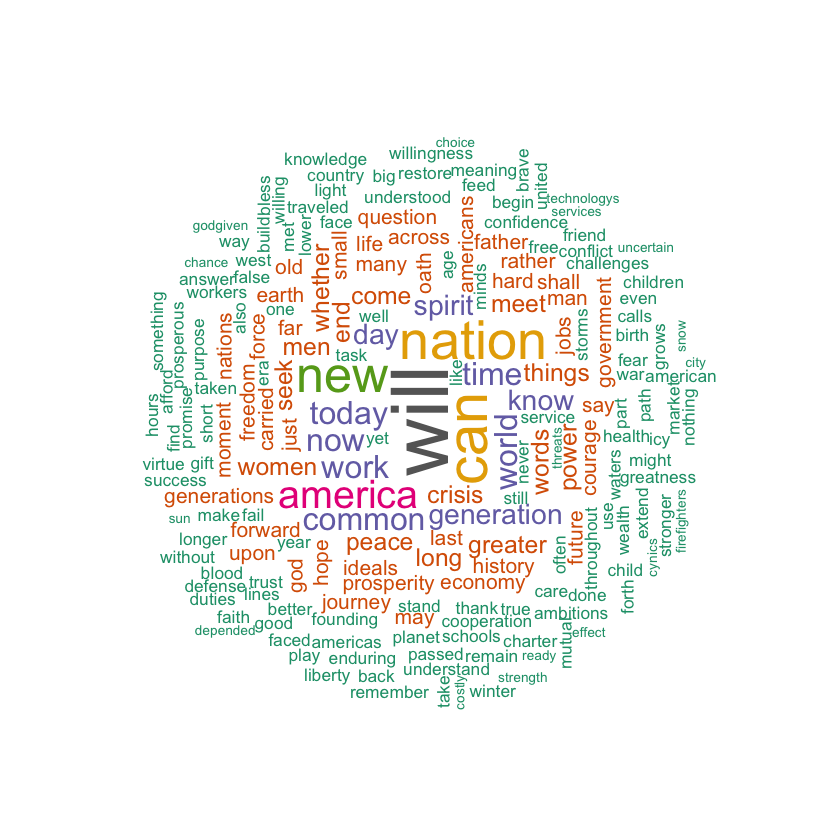

In [14]:
# wordCloud 하기 
palete= brewer.pal(8,"Dark2")
wordcloud(words = d$word,
         freq = d$freq,
         min.freq=1,
         max.word=200,
         random.order = F,
         rot.per = 0.35,
         colors = palete)